In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [2]:
res_level= pd.read_csv("chennai_reservoir_levels.csv")
res_rainfall =pd.read_csv("chennai_reservoir_rainfall.csv")

In [41]:
res_level.tail()

,Date,POONDI,CHOLAVARAM,REDHILLS,CHEMBARAMBAKKAM,Total,Year,Month
5642,2019-06-13,30.0,0.0,0.0,1.0,31.0,2019,Jun
5643,2019-06-14,28.0,0.0,0.0,1.0,29.0,2019,Jun
5644,2019-06-15,27.0,0.0,0.0,1.0,28.0,2019,Jun
5645,2019-06-16,26.0,0.0,0.0,1.0,27.0,2019,Jun
5646,2019-06-17,25.0,0.0,0.0,1.0,26.0,2019,Jun


In [4]:
res_rainfall.head()

,Date,POONDI,CHOLAVARAM,REDHILLS,CHEMBARAMBAKKAM
0,01-01-2004,0.0,0.0,0.0,0.0
1,02-01-2004,0.0,0.0,0.0,0.0
2,03-01-2004,0.0,0.0,0.0,0.0
3,04-01-2004,0.0,0.0,0.0,0.0
4,05-01-2004,0.0,0.0,0.0,0.0


In [5]:
res_level.describe()

,POONDI,CHOLAVARAM,REDHILLS,CHEMBARAMBAKKAM
count,5647.000000,5647.000000,5647.000000,5647.000000
mean,1133.272203,240.020572,1568.345573,1321.381645
std,1026.009311,274.601731,890.363617,957.057834
min,0.900000,0.000000,0.000000,0.000000
25%,213.000000,22.300000,849.000000,471.500000
50%,782.000000,92.000000,1630.000000,1225.000000
75%,2006.000000,460.000000,2236.000000,2083.000000
max,3231.000000,896.000000,3300.000000,3396.000000


In [6]:
res_level['Date']=pd.to_datetime(res_level['Date'],format='%d-%m-%Y')


In [7]:
res_level.head()

,Date,POONDI,CHOLAVARAM,REDHILLS,CHEMBARAMBAKKAM
0,2004-01-01,3.9,0.0,268.0,0.0
1,2004-01-02,3.9,0.0,268.0,0.0
2,2004-01-03,3.9,0.0,267.0,0.0
3,2004-01-04,3.9,0.0,267.0,0.0
4,2004-01-05,3.8,0.0,267.0,0.0


In [8]:
res_level.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5647 entries, 0 to 5646
Data columns (total 5 columns):
Date               5647 non-null datetime64[ns]
POONDI             5647 non-null float64
CHOLAVARAM         5647 non-null float64
REDHILLS           5647 non-null float64
CHEMBARAMBAKKAM    5647 non-null float64
dtypes: datetime64[ns](1), float64(4)
memory usage: 220.7 KB


In [9]:
res_level['Total']=res_level['POONDI']+res_level['CHOLAVARAM']+res_level['REDHILLS']+res_level['CHEMBARAMBAKKAM']
res_level["Year"]=res_level.Date.dt.year
res_level['Month']=res_level.Date.dt.month
res_level.Month.replace([1,2,3,4,5,6,7,8,9,10,11,12],['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'], inplace = True)
res_level.Month=pd.Categorical(res_level.Month,['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'],ordered=True)

res_level.tail()


,Date,POONDI,CHOLAVARAM,REDHILLS,CHEMBARAMBAKKAM,Total,Year,Month
5642,2019-06-13,30.0,0.0,0.0,1.0,31.0,2019,Jun
5643,2019-06-14,28.0,0.0,0.0,1.0,29.0,2019,Jun
5644,2019-06-15,27.0,0.0,0.0,1.0,28.0,2019,Jun
5645,2019-06-16,26.0,0.0,0.0,1.0,27.0,2019,Jun
5646,2019-06-17,25.0,0.0,0.0,1.0,26.0,2019,Jun


# Chennai Water Reservoir Level Exploratory Data Analysis

## Level of Water by Year

Text(0, 0.5, 'Level of Water over respective years!')

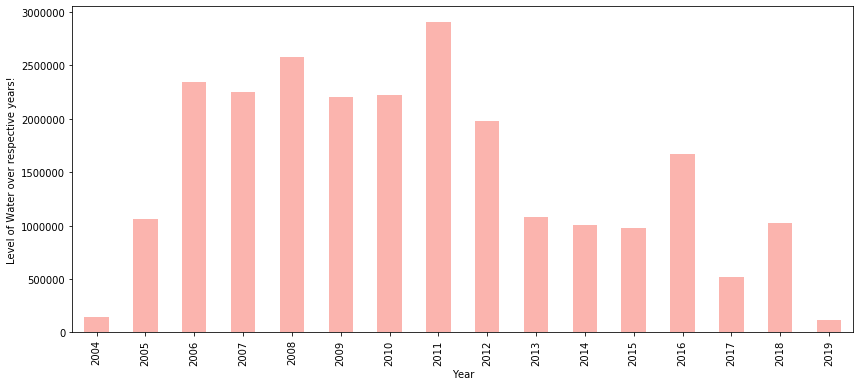

In [10]:
plt.figure(figsize=(14,6))
year_group_by = res_level.groupby('Year')['Total'].sum();
year_group_by.plot(kind='bar',colormap='Pastel1');
plt.ylabel('Level of Water over respective years!')

In 2004 and 2019 all most water level met 0 level and 2011 all are met its peek.

## Plotting for POONDI with date for reservoir quantity from 2004 to 2019

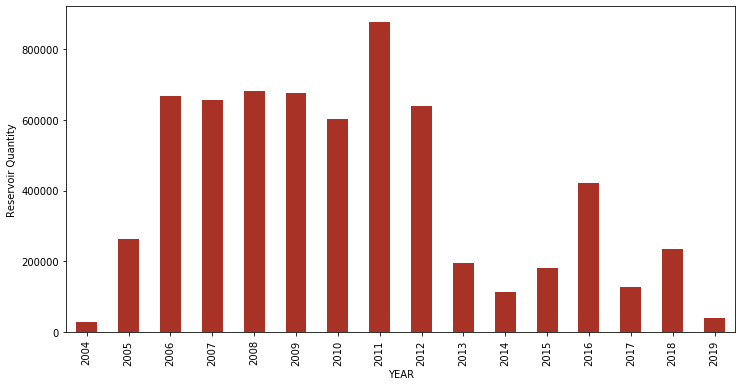

In [11]:
plt.figure(figsize=(12,6))
POONDI=res_level.groupby('Year')['POONDI'].sum()
POONDI.plot(color='#A93226',kind='bar')
plt.xlabel("YEAR")
plt.ylabel('Reservoir Quantity')
plt.show()

 ## Plotting for CHOLAVARAM with date for reservoir quantity from 2004 to 2019

<Figure size 864x432 with 0 Axes>

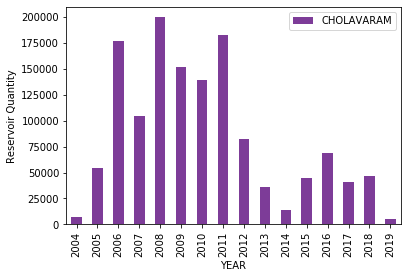

In [12]:

#sns.set(rc={'figure.figsize':(15,7)})

plt.figure(figsize=(12,6))
CHOLAVARAM=res_level.groupby('Year')[['CHOLAVARAM']].sum()
CHOLAVARAM.plot(color='#7D3C98',kind='bar')
plt.xlabel("YEAR")
plt.ylabel('Reservoir Quantity')
plt.show()

## Plotting for REDHILLS with date for reservoir quantity from 2004 to 2019

Text(0, 0.5, 'Reservoir Quantity')

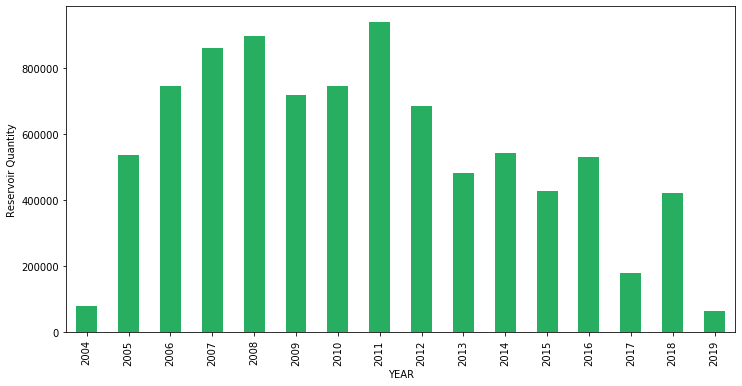

In [13]:
plt.figure(figsize=(12,6))
CHEMBARAMBAKKAM=res_level.groupby('Year')['REDHILLS'].sum()
CHEMBARAMBAKKAM.plot(color='#27AE60',kind='bar')
plt.xlabel("YEAR")
plt.ylabel('Reservoir Quantity')

## Plotting for CHEMBARAMBAKKAM with date for reservoir quantity from 2004 to 2019

Text(0, 0.5, 'Reservoir Quantity')

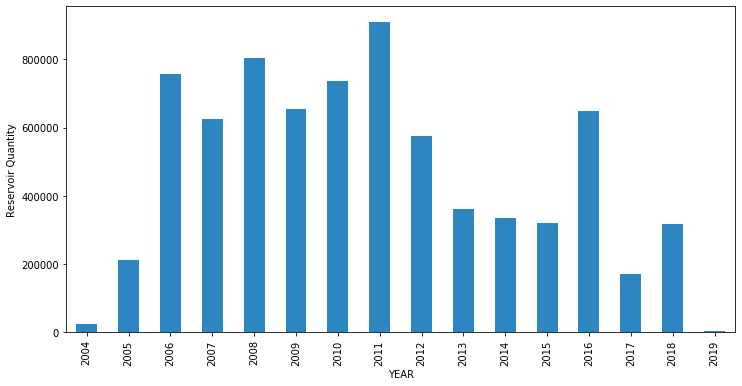

In [14]:
plt.figure(figsize=(12,6))
CHEMBARAMBAKKAM=res_level.groupby('Year')['CHEMBARAMBAKKAM'].sum()
CHEMBARAMBAKKAM.plot(color='#2E86C1',kind='bar')
plt.xlabel("YEAR")
plt.ylabel('Reservoir Quantity')

## Plotting all the reservoirs' storage (in million cubic feet) for years 2004 to 2019 in a single plot

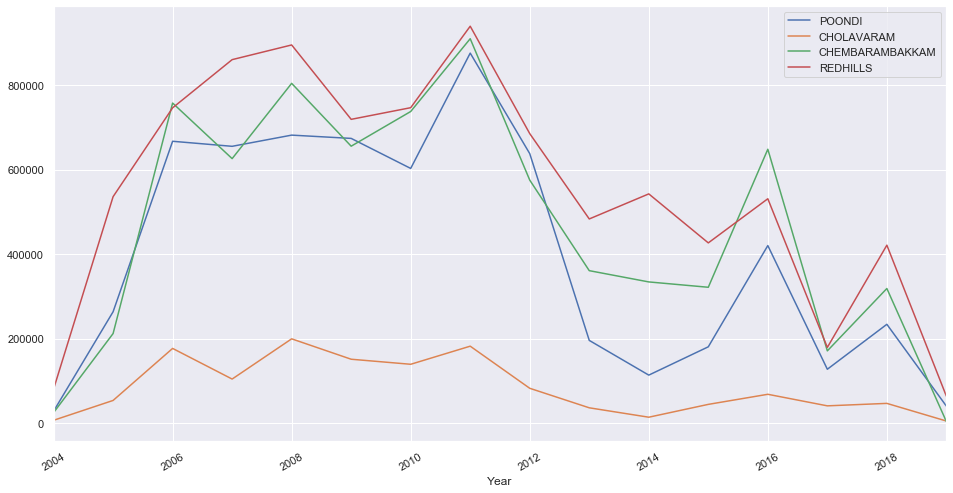

In [15]:
sns.set(rc={'figure.figsize':(16,8)}) 
res_level_all= res_level.groupby('Year')[['POONDI', 'CHOLAVARAM', 'CHEMBARAMBAKKAM', 'REDHILLS']].sum()
res_level_all.plot()
plt.xticks(rotation=30)
plt.show()




The years from 2012 to 2015 show a drastic descrease in the quantity of all reservoirs which is  a result of severe droughts faced by Tamil Nadu during these last 3 years

## Yearly  Lake Reservior

In [16]:
lakes =['POONDI', 'CHOLAVARAM', 'CHEMBARAMBAKKAM', 'REDHILLS']

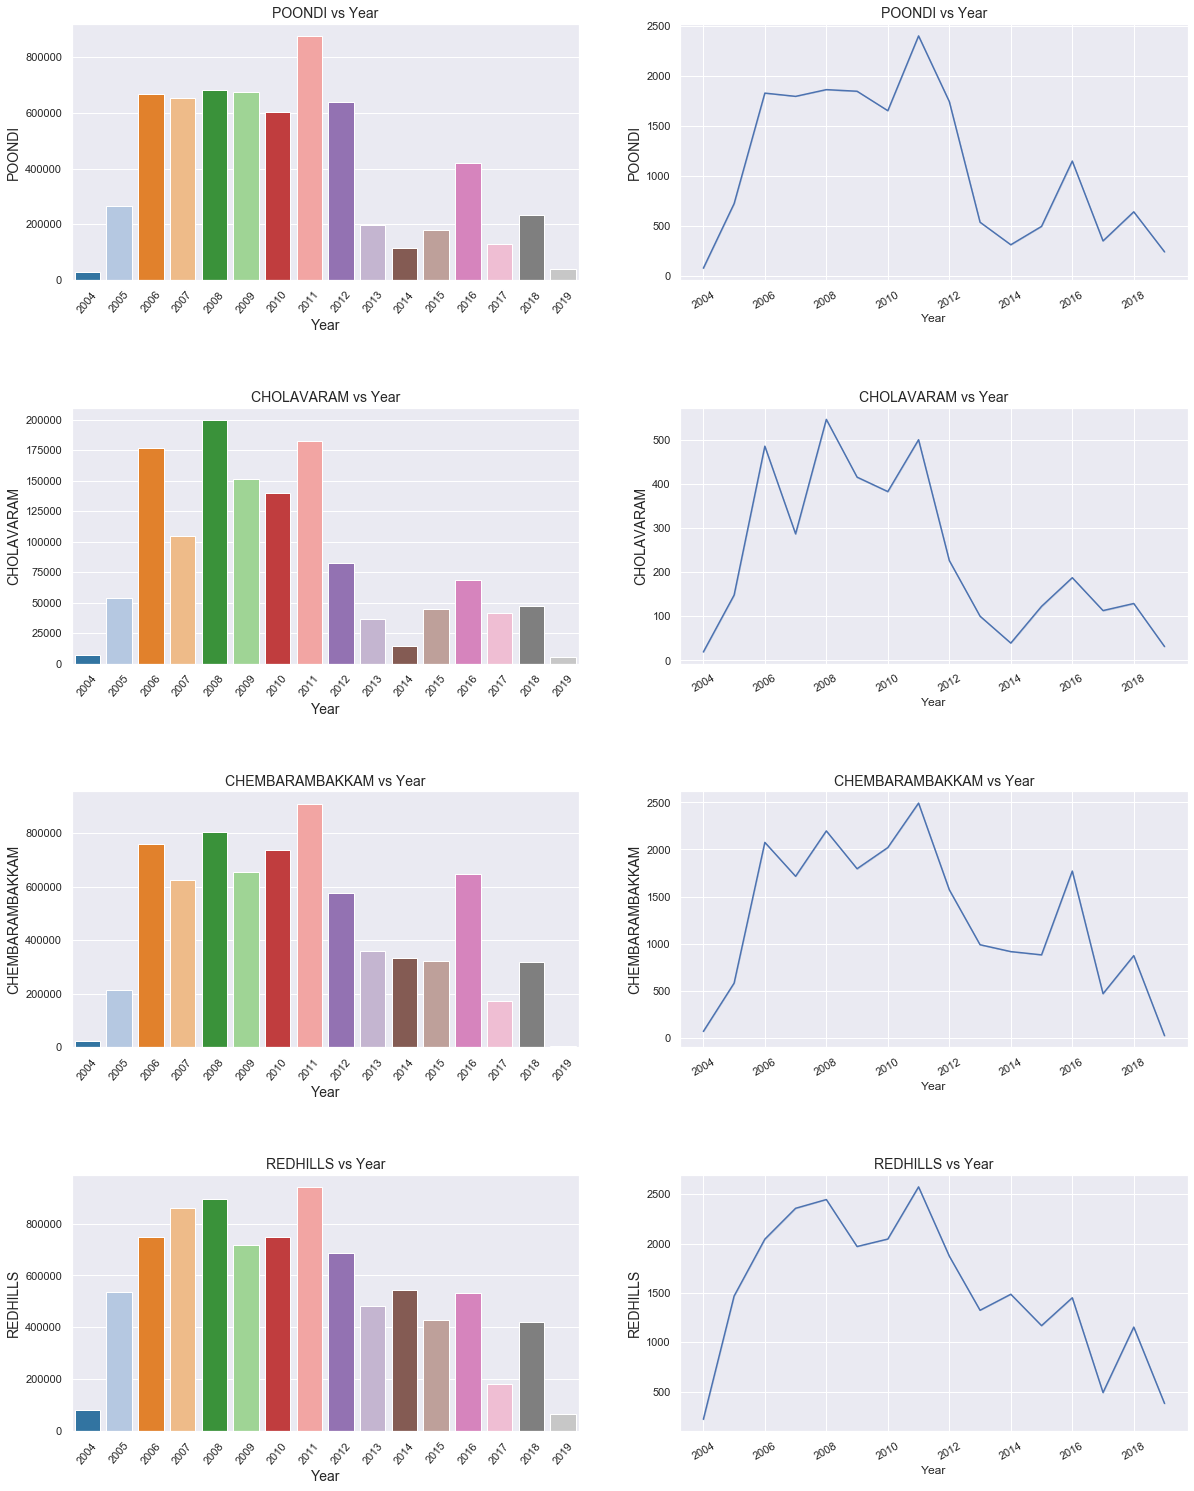

In [17]:
year = res_level.groupby('Year').sum().reset_index()

plt.figure(figsize=(20,40))


i=0
for lake in lakes:
    plt.subplot(6,2,i+1)
    sns.barplot(x='Year',y=lake,data=year,palette='tab20')
    plt.xticks(rotation = 50)
    plt.xlabel('Year',size=14)
    plt.ylabel(lake,size=14)
    plt.title(lake + ' vs Year', size = 14)
    
    
    plt.subplot(6,2, i+2)
    sns.lineplot(x = 'Year',y= lake, data =res_level,ci = False,  palette= 'hsv')
    plt.xticks(rotation = 30)
    plt.xlabel('Year')
    plt.ylabel(lake,size=14)
    plt.title(lake + ' vs Year', size = 14)
    plt.subplots_adjust(hspace = 0.5)
    i+=2
plt.show()


1. Above Subplots we can see that before 2011 all 4 lakes Perfomed well.
2. After 2011 all Lakes are not Performing well.
3. There water level gradually decreased.
4. In the year of 2011 all lakes perfome good.
5. Cholavaram Lake performing well on 2006 and 2008 rather than 2011.

In [18]:
res_level_POONDI = res_level.loc[:,['POONDI','Year','Total']]
res_level_REDHILLS = res_level.loc[:,['REDHILLS','Year','Total']]
res_level_CHEMBARAMBAKKAM = res_level.loc[:,['CHEMBARAMBAKKAM','Year','Total']]
res_level_CHOLAVARAM = res_level.loc[:,['CHOLAVARAM','Year','Total']]

# Behaviour/contribution in comparison to Total


## POONI

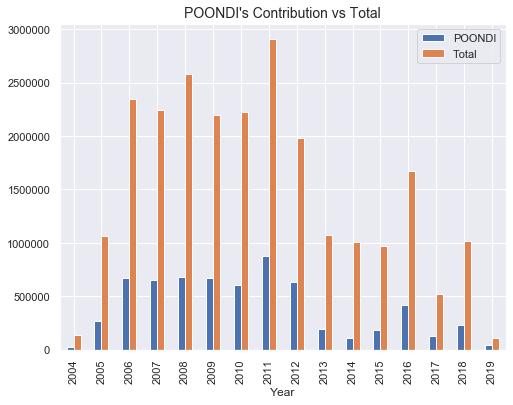

In [19]:
plt.figure(figsize=(8,6))
POONDI_comp = res_level_POONDI.groupby('Year')[['POONDI','Total']].sum()
POONDI_comp.plot(kind='bar',ax=plt.gca())
#sns.barplot(x='Year',y='Total',data=res_level,hue='POONDI')
plt.title("POONDI's Contribution vs Total",size =14)
plt.show()

## REDHILLS

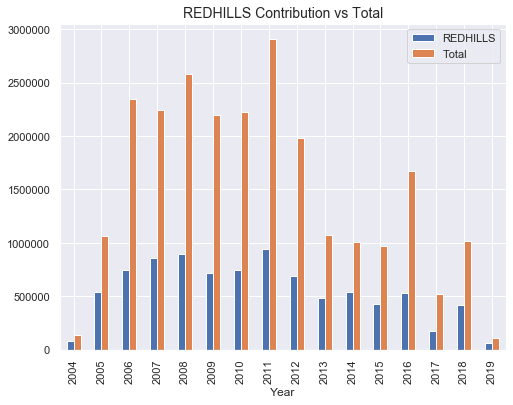

In [20]:

plt.figure(figsize=(8,6))
REDHILLS_comp = res_level_REDHILLS.groupby('Year')[['REDHILLS','Total']].sum()
REDHILLS_comp.plot(kind='bar',ax=plt.gca())
plt.title("REDHILLS Contribution vs Total",size =14)
plt.show()

## CHEMBARAMBAKKAM

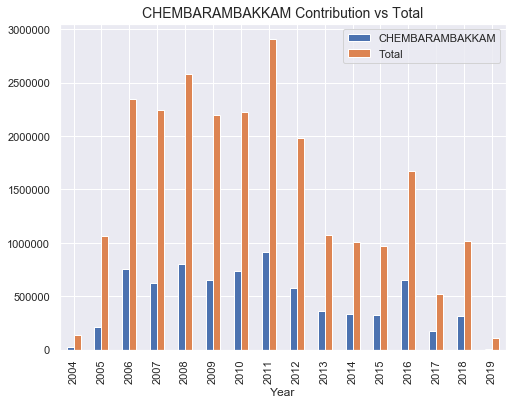

In [21]:
plt.figure(figsize=(8,6))
CHEMBARAMBAKKAM_comp = res_level_CHEMBARAMBAKKAM.groupby('Year')[['CHEMBARAMBAKKAM','Total']].sum()
CHEMBARAMBAKKAM_comp.plot(kind='bar',ax=plt.gca())
plt.title("CHEMBARAMBAKKAM Contribution vs Total",size =14)
plt.show()

## CHOLAVARAM

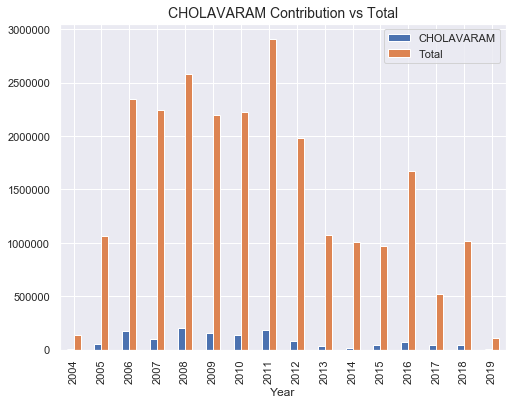

In [22]:
plt.figure(figsize=(8,6))
CHOLAVARAM_comp = res_level_CHOLAVARAM.groupby('Year')[['CHOLAVARAM','Total']].sum()
CHOLAVARAM_comp.plot(kind='bar',ax=plt.gca())
plt.title("CHOLAVARAM Contribution vs Total",size =14)
plt.show()

All Comparsion between Contribution of water in the total water ,we can see that the Contribution of CHOLAVARAM is Very low every year. 

(array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5]), <a list of 6 Text yticklabel objects>)

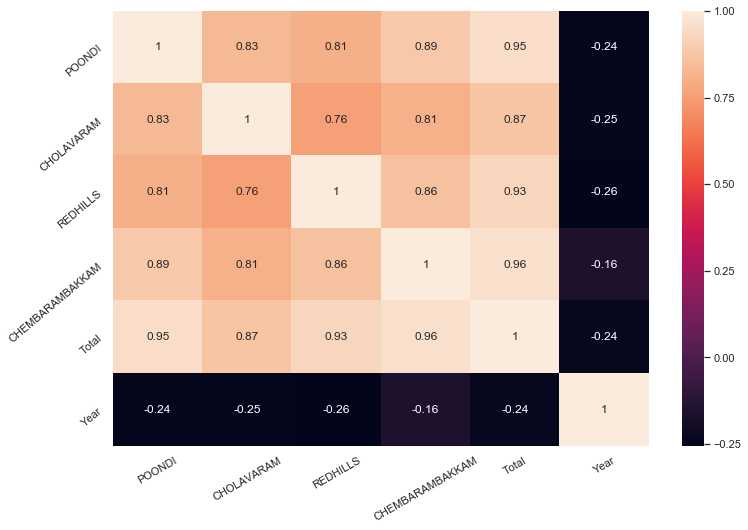

In [23]:
plt.figure(figsize=(12,8))
sns.heatmap(res_level.corr(),annot=True)
plt.xticks(rotation=30)
plt.yticks(rotation=40)

# Chennai Reservoir Rainfall Exploratory Data Analysis

In [24]:
res_rainfall.head()

,Date,POONDI,CHOLAVARAM,REDHILLS,CHEMBARAMBAKKAM
0,01-01-2004,0.0,0.0,0.0,0.0
1,02-01-2004,0.0,0.0,0.0,0.0
2,03-01-2004,0.0,0.0,0.0,0.0
3,04-01-2004,0.0,0.0,0.0,0.0
4,05-01-2004,0.0,0.0,0.0,0.0


In [25]:
res_rainfall.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5647 entries, 0 to 5646
Data columns (total 5 columns):
Date               5647 non-null object
POONDI             5647 non-null float64
CHOLAVARAM         5647 non-null float64
REDHILLS           5647 non-null float64
CHEMBARAMBAKKAM    5647 non-null float64
dtypes: float64(4), object(1)
memory usage: 220.7+ KB


In [26]:
res_rainfall['Date']=pd.to_datetime(res_rainfall['Date'],format='%d-%m-%Y')
res_rainfall.tail()

,Date,POONDI,CHOLAVARAM,REDHILLS,CHEMBARAMBAKKAM
5642,2019-06-13,0.0,0.0,0.0,0.0
5643,2019-06-14,0.0,0.0,0.0,0.0
5644,2019-06-15,0.0,0.0,0.0,0.0
5645,2019-06-16,0.0,0.0,0.0,0.0
5646,2019-06-17,0.0,0.0,0.0,0.0


In [27]:
res_rainfall.describe()

,POONDI,CHOLAVARAM,REDHILLS,CHEMBARAMBAKKAM
count,5647.000000,5647.000000,5647.000000,5647.000000
mean,3.364486,3.617177,3.756862,3.923862
std,12.755029,14.078840,15.060551,16.287227
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000
max,300.000000,293.000000,320.000000,475.000000


## level of Rainfall year 2004 to 2019

In [28]:
res_rainfall['Year']=res_rainfall.Date.dt.year
res_rainfall['Month']=res_rainfall.Date.dt.month
res_rainfall['Total']=res_rainfall.POONDI+res_rainfall.CHOLAVARAM+res_rainfall.REDHILLS+res_rainfall.CHEMBARAMBAKKAM
res_rainfall.Month.replace([1,2,3,4,5,6,7,8,9,10,11,12],
             ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'], inplace = True)


res_rainfall.Month = pd.Categorical(res_rainfall.Month,
                                   ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'], 
                                   ordered = True )


In [29]:
res_rainfall.head(5)

,Date,POONDI,CHOLAVARAM,REDHILLS,CHEMBARAMBAKKAM,Year,Month,Total
0,2004-01-01,0.0,0.0,0.0,0.0,2004,Jan,0.0
1,2004-01-02,0.0,0.0,0.0,0.0,2004,Jan,0.0
2,2004-01-03,0.0,0.0,0.0,0.0,2004,Jan,0.0
3,2004-01-04,0.0,0.0,0.0,0.0,2004,Jan,0.0
4,2004-01-05,0.0,0.0,0.0,0.0,2004,Jan,0.0


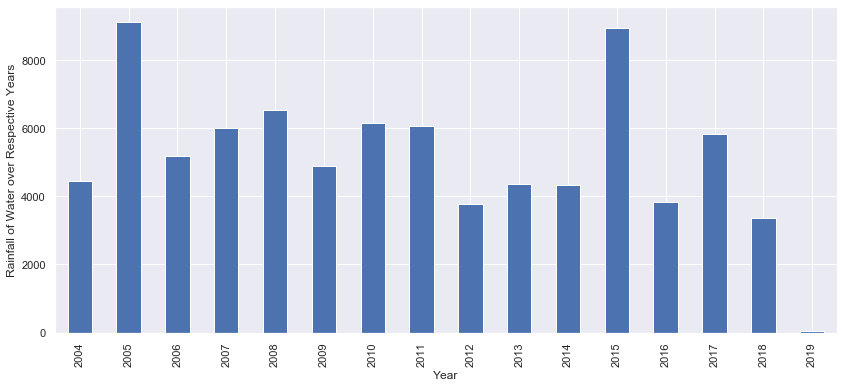

In [30]:
plt.figure(figsize=(14,6))
group_year=res_rainfall.groupby('Year')['Total'].sum()
group_year.plot(kind='bar')
plt.ylabel('Rainfall of Water over Respective Years')
plt.show()

## Plotting Rainfall data with all Lakes same plot 

<Figure size 1008x432 with 0 Axes>

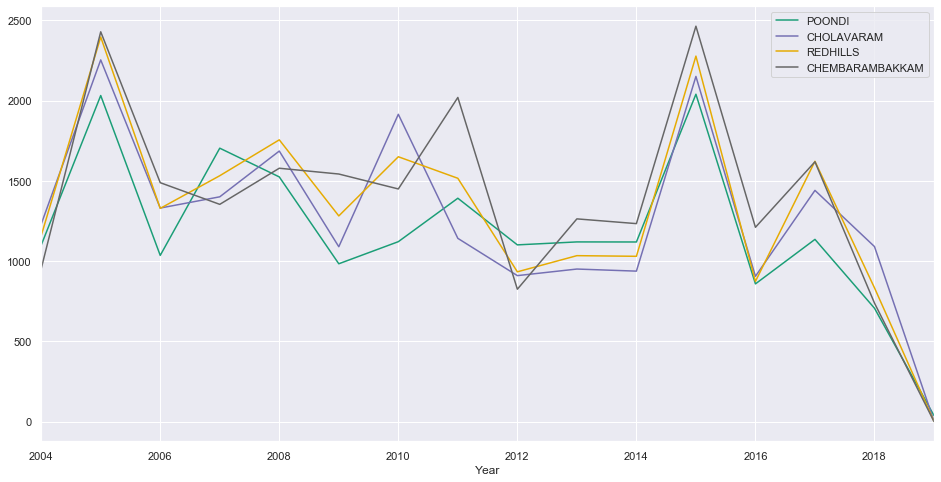

In [31]:
plt.figure(figsize=(14,6))
all_lakes = res_rainfall.groupby('Year')[["POONDI","CHOLAVARAM","REDHILLS","CHEMBARAMBAKKAM"]].sum()
all_lakes.plot(colormap='Dark2')
plt.show()


## Total Rainfall over the  2004 to 2019

Text(0.5, 1.0, 'Rainfall level 2004 to 2019')

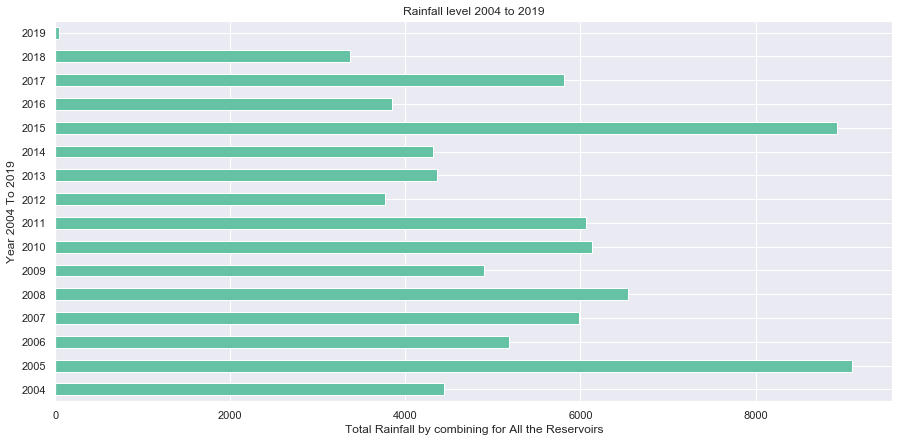

In [32]:
plt.figure(figsize=(15,7))
rainfall_year = res_rainfall.groupby('Year')['Total'].sum()
rainfall_year.plot(kind='barh',colormap="Set2")
plt.xlabel('Total Rainfall by combining for All the Reservoirs')
plt.ylabel('Year 2004 To 2019')
plt.title('Rainfall level 2004 to 2019')

So we get to know that the Highest amount of Rainfall was recieved in 2005 and 2015

## Yearly Water Level vs Rainfall 

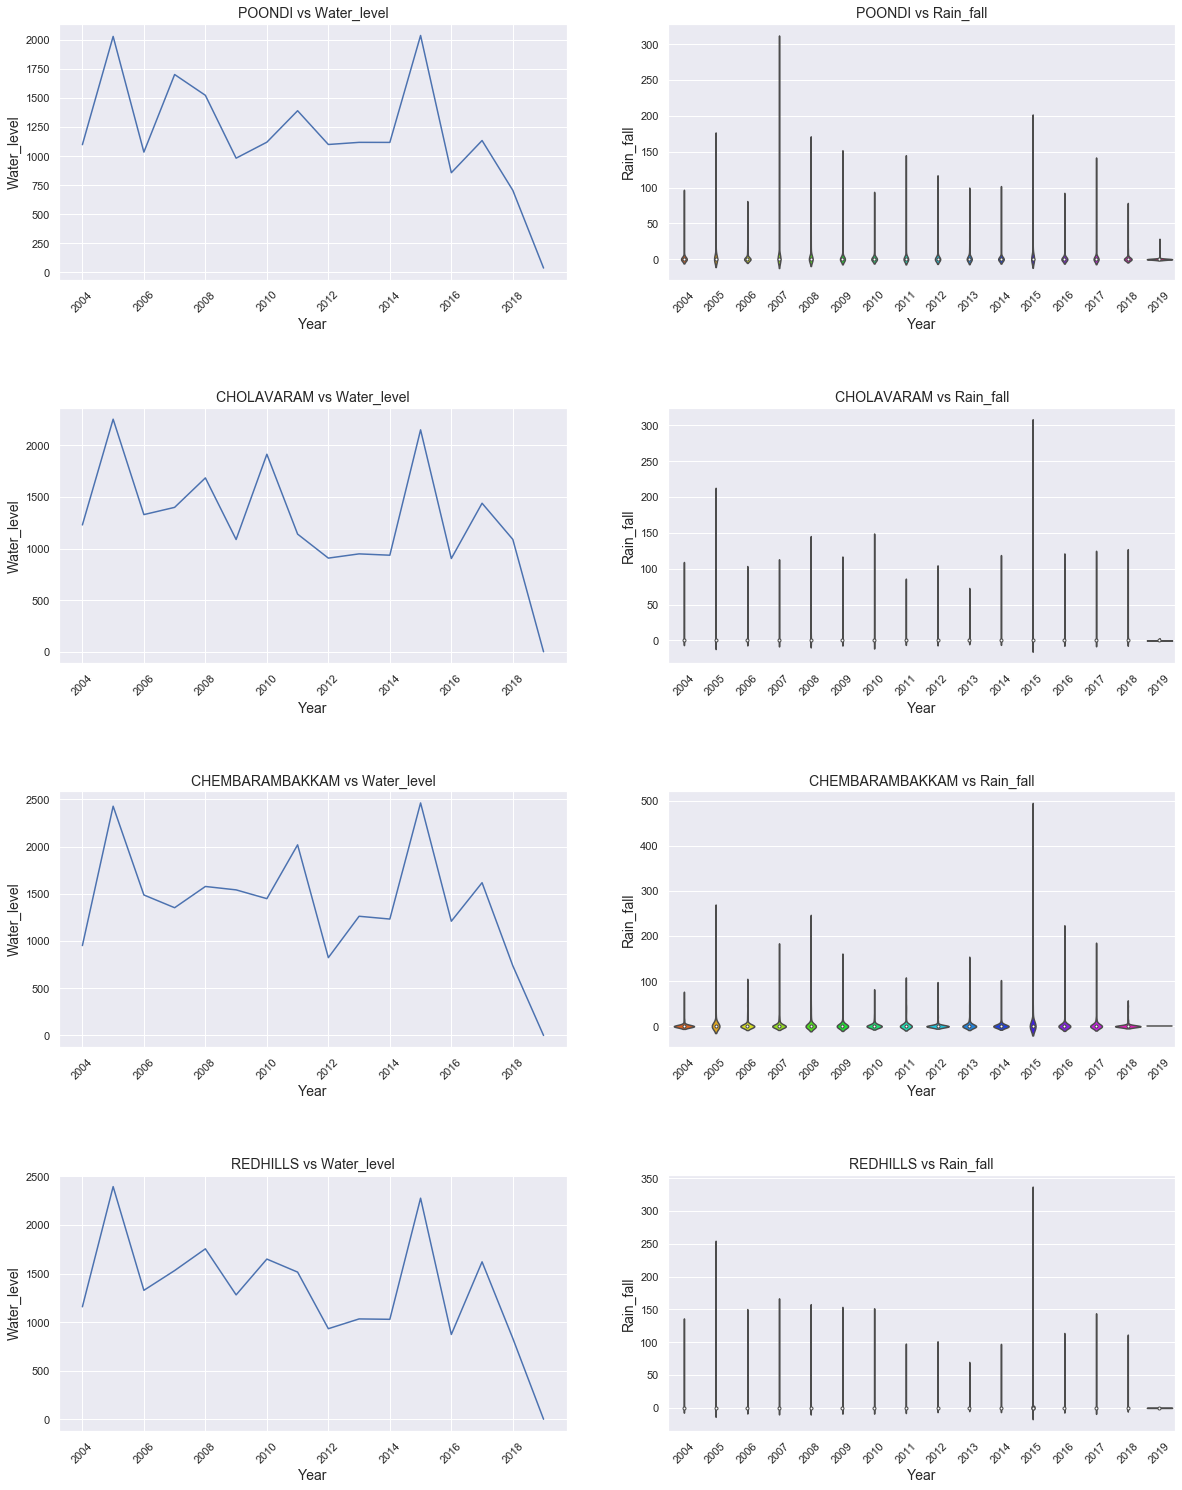

In [33]:

year_rain_fall = res_rainfall.groupby('Year').sum().reset_index()


plt.figure(figsize = (20,40))
i = 0
for lake in lakes:
    plt.subplot(6,2,i+1)
    sns.lineplot(x = 'Year', y = lake, data = year_rain_fall, ci = False)
    plt.xticks(rotation = 45)
    plt.xlabel('Year',size=14)
    plt.ylabel('Water_level',size=14)
    plt.title(lake + ' vs Water_level',size=14)

    
    plt.subplot(6,2,i+2)
    sns.violinplot(x = 'Year', y = lake, data = res_rainfall, ci= False,palette= 'hsv',)
    plt.xticks(rotation = 45)
    plt.xlabel('Year',size=14)
    plt.ylabel('Rain_fall',size=14)
    plt.title(lake + ' vs Rain_fall',size=14)
    plt.subplots_adjust(hspace = 0.5)
    i+=2
plt.show()

After 2016 Water level also Decrease With Rain fall Also Decrease

## Monthly Water Level vs Rainfall 

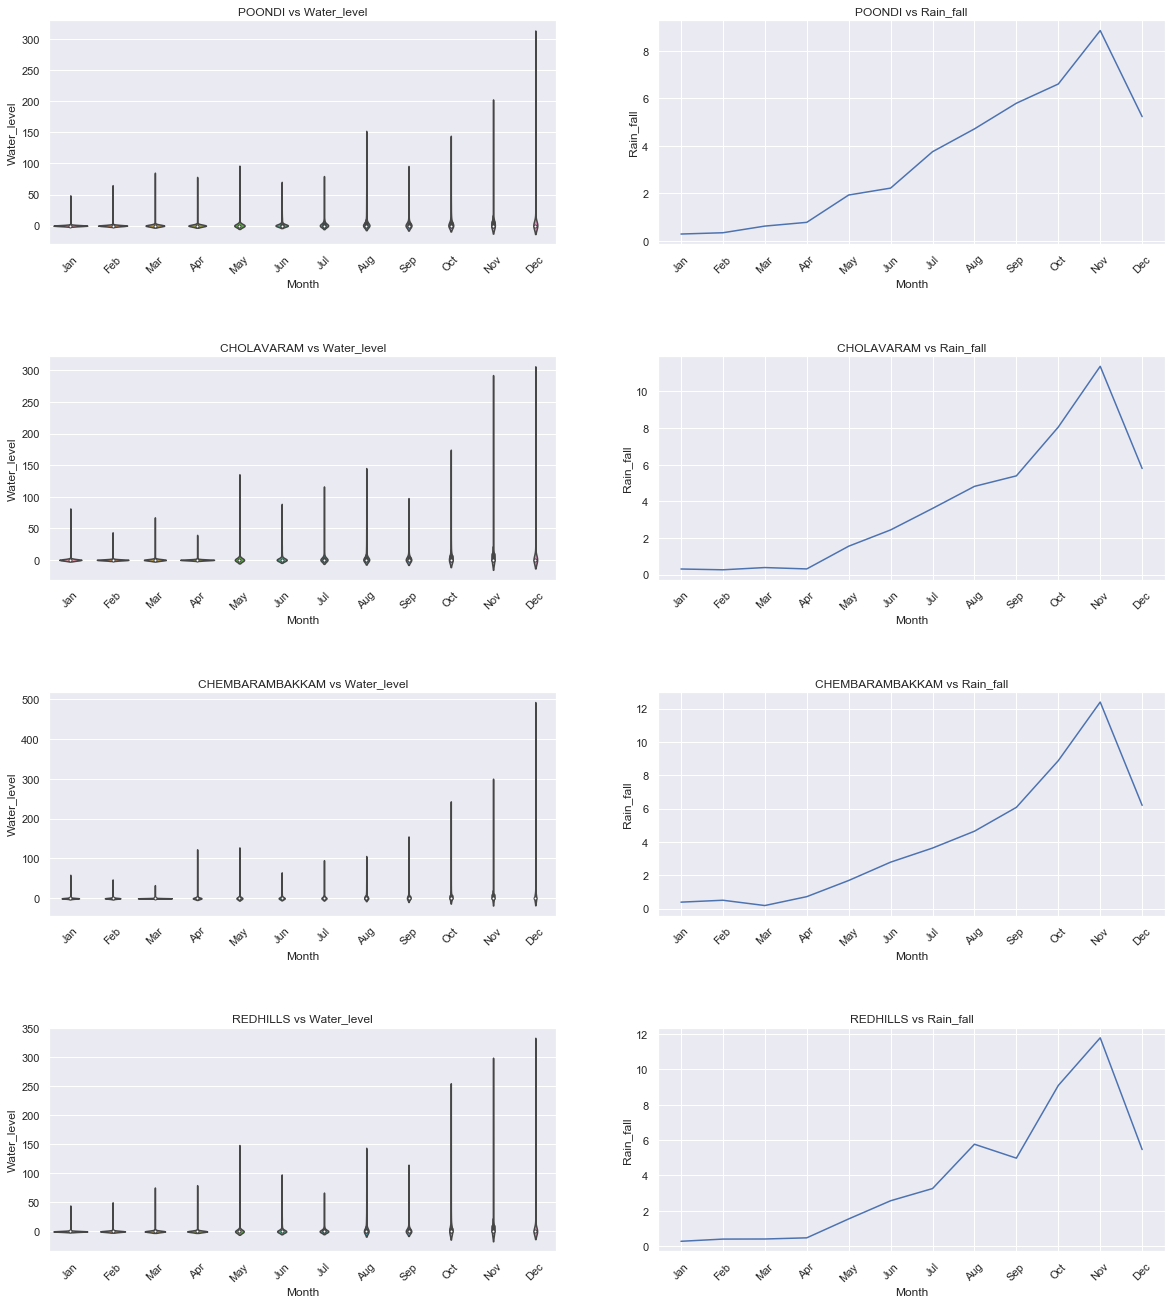

In [34]:

month_rain_fall = res_rainfall.groupby('Month').mean().reset_index()


plt.figure(figsize = (20,35))
i = 0
for lake in lakes:
    plt.subplot(6,2,i+1)
    sns.violinplot(x = 'Month', y = lake, data = res_rainfall,ci=False)
    plt.xticks(rotation = 45)
    plt.xlabel('Month')
    plt.ylabel('Water_level')
    plt.title(lake + ' vs Water_level')

    
    plt.subplot(6,2,i+2)
    sns.lineplot(x = 'Month', y = lake, data = month_rain_fall,ci=False)
    plt.xticks(rotation = 45)
    plt.xlabel('Month')
    plt.ylabel('Rain_fall')
    plt.title(lake + ' vs Rain_fall')
    plt.subplots_adjust(hspace = 0.5)
    i+=2
plt.show()

It seems water level gradually increased from Auguset to December end due to rain fall then it fall down since next monsoon come.

In [35]:
df_POONDI = pd.DataFrame({
        'Rainfall': res_rainfall.POONDI, 
        'Reservoir': res_level.POONDI,
        'Year':res_level.Year
    })

df_CHEMBARAMBAKKAM = pd.DataFrame({
        'Rainfall': res_rainfall.CHEMBARAMBAKKAM,
        'Reservoir': res_level.CHEMBARAMBAKKAM,
        'Year':res_level.Year
    })

df_CHOLAVARAM = pd.DataFrame({
        'Rainfall': res_rainfall.CHOLAVARAM ,
        'Reservoir':res_rainfall.CHOLAVARAM,
        'Year':res_level.Year
    })

df_REDHILLS = pd.DataFrame({
        'Rainfall': res_rainfall.REDHILLS ,
        'Reservoir':res_level.REDHILLS,
        'Year':res_level.Year
    })

## Comparsion Between Water Level and Rainfall Level Every year

## POONDI

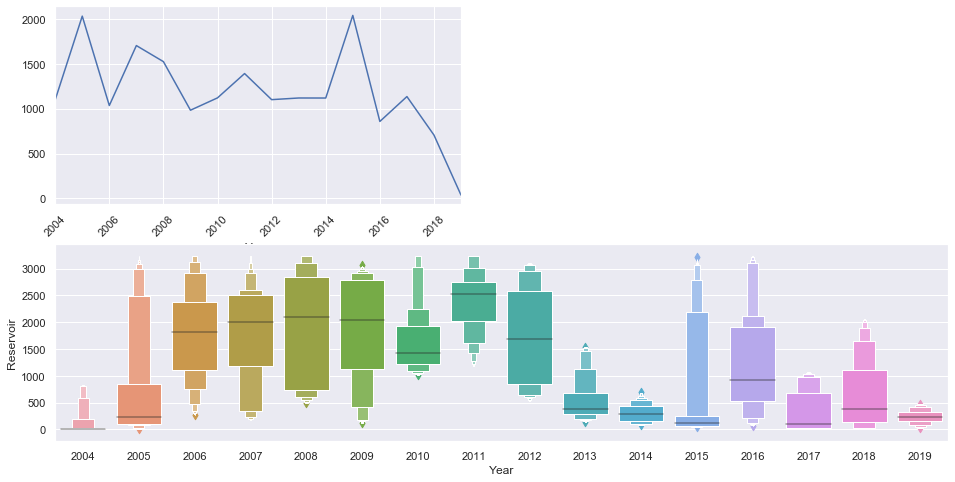

In [36]:

#plt.figure(figsize=(10,6))
plt.subplot(2,2,1)
#sns.barplot(x='Year',y=p_m,data=df_POONDI)
a=df_POONDI.groupby('Year')['Rainfall'].sum()
a.plot(kind='line')
plt.xticks(rotation = 45)
plt.xlabel("Year",size=12)

plt.subplot(2,1,2)
sns.boxenplot(x='Year',y='Reservoir',data=df_POONDI)




## CHEMBARAMBAKKAM

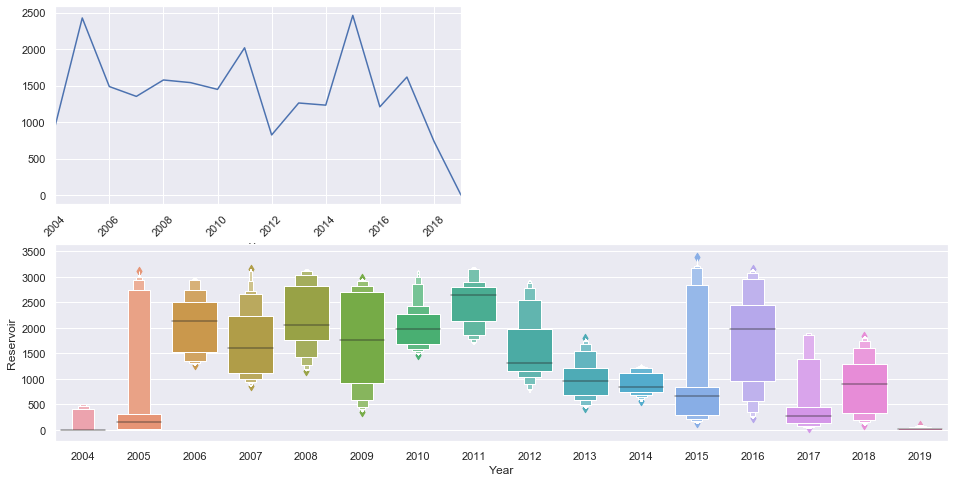

In [42]:

plt.subplot(2,2,1)
a=df_CHEMBARAMBAKKAM.groupby('Year')['Rainfall'].sum()
a.plot(kind='line')
plt.xticks(rotation = 45)
plt.xlabel("Year",size=10)

plt.subplot(2,1,2)
sns.boxenplot(x='Year',y='Reservoir',data=df_CHEMBARAMBAKKAM)

## CHOLAVARAM

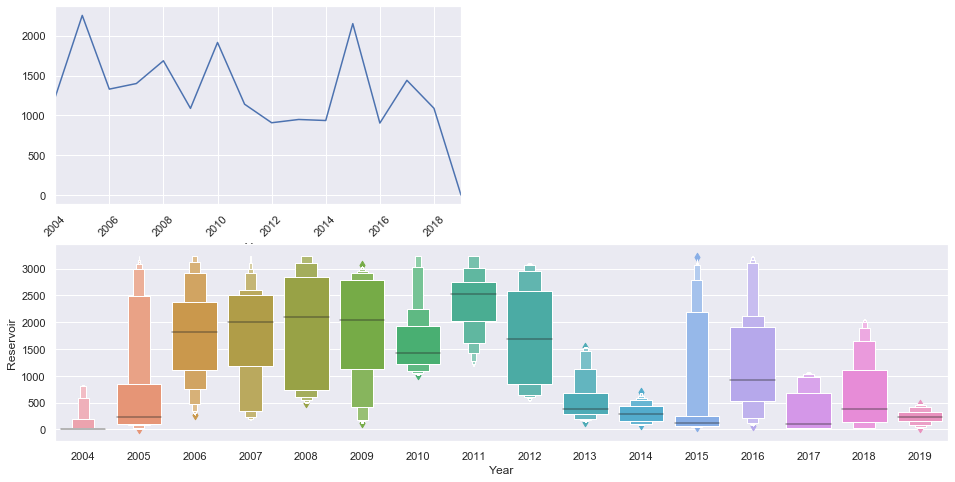

In [38]:
plt.subplot(2,2,1)
a=df_CHOLAVARAM.groupby('Year')['Rainfall'].sum()
a.plot(kind='line')
plt.xticks(rotation = 45)
plt.xlabel("Year",size=12)

plt.subplot(2,1,2)
sns.boxenplot(x='Year',y='Reservoir',data=df_POONDI)

## REDHILLS

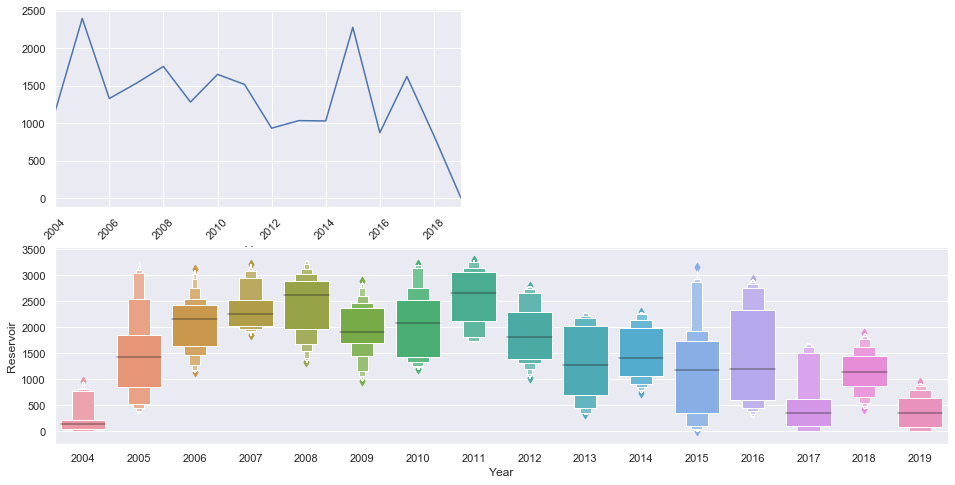

In [43]:
plt.subplot(2,2,1)
a=df_REDHILLS.groupby('Year')['Rainfall'].sum()
a.plot(kind='line')
plt.xticks(rotation = 45)
plt.xlabel("Year",size=12)



plt.subplot(2,1,2)
sns.boxenplot(x='Year',y='Reservoir',data=df_REDHILLS)

In [40]:
average_rainfall =res_rainfall['Total'].sum()/len(res_rainfall.index) 
print('Average Rainfall over the Years: {}'.format(average_rainfall))
average_water_levels = res_level['Total'].sum()/len(res_level.index) 
print('Average Water Level over the Years: {}'.format(average_water_levels))

Average Rainfall over the Years: 14.662387108199043
Average Water Level over the Years: 4263.019992916593


# Observations from the above analysis :

 we can see that year 2005 and 2015 recieved the highest rainfall, although that turned into a Natural Disaster.

Monsoon is at its peak during the months of September to December in Chennai, which is quite late when compared to the rest of the country.

In This time water level and rain fall also increase .

2015 to 2019 rain fall is decrease so current water crisis compared to previous years 

In [ ]:
0
